In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold as sk
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [2]:
#Loading the Dataset
df = pd.read_csv(r'C:\Users\Lester\OneDrive - Singapore Institute Of Technology\Documents\Data_Analytics_Project\FinalMissingData.csv')
df[0:10]
df = df.replace('1','Normal1').replace('3','Condition3').replace('4','Condition4')

In [3]:
#Summarize of Data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Condition,131.0,2.549618,1.284306,1.000000,1.000000,3.000000,4.000000,4.00000
Cylinder heating zone 1,131.0,279.639285,7.706187,266.280000,273.460000,279.270000,286.395000,293.44000
Cylinder heating zone 4,131.0,310.104116,8.833077,295.500000,301.895000,310.310000,317.530000,325.39000
Maximum injection pressure,131.0,1563.298268,55.998872,1440.620000,1527.145000,1554.840000,1598.915000,1687.83000
Mould temperature control unit 1,131.0,90.054128,2.699679,85.510000,87.750000,89.960000,92.480000,94.60000
Cycle time,131.0,28.886511,0.832493,27.434000,28.154000,28.910000,29.650000,30.26800
Cylinder heating zone 5,131.0,315.761168,8.418270,299.810000,309.625000,315.220000,322.360000,330.70000
Injection time,131.0,0.233080,0.009899,0.218000,0.224000,0.233574,0.240000,0.25000
Cylinder heating zone 2,131.0,296.384843,8.242875,280.300000,289.595000,296.612500,303.210000,309.84000
Dosage time,131.0,2.897027,0.092256,2.704000,2.827000,2.902000,2.968000,3.09800


In [4]:
#Normalize Data Predictors (Zero-score normalization)
target_column= ['Condition']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df[0:10]

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,1,0.925300,0.971573,0.892353,0.979175,0.986520,0.959571,0.936000,0.970695,0.963848,0.964714,0.770979,0.845348
1,1,0.924175,0.984173,0.860484,0.971987,0.995705,0.915694,0.936000,0.973632,0.970949,0.920698,0.708608,0.846517
2,1,0.964729,0.944252,0.873862,0.926427,0.943769,0.926126,0.936000,0.923735,1.000000,0.951128,0.719003,0.810898
3,1,0.918995,0.918313,0.916402,0.998309,0.917999,0.963290,0.896000,0.920572,0.983861,0.942153,0.786572,0.826389
4,1,0.989027,0.961738,0.946861,0.996934,0.985728,0.981947,0.976000,0.974923,0.967721,0.953157,0.785687,0.840011
5,1,0.982824,0.952849,0.919654,0.931712,0.975155,0.939673,0.976000,0.960915,0.916720,0.929458,0.796967,0.787604
6,1,0.930957,0.980546,0.885113,0.979175,0.948791,0.974660,0.934298,0.916021,0.983861,0.947264,0.724200,0.834700
7,1,1.000000,0.963121,0.906472,0.932770,0.925664,0.956278,0.976000,0.980151,0.923176,0.999078,0.859338,0.842521
8,1,0.993389,0.978395,0.855791,0.918499,0.945487,0.969066,0.936000,0.992835,0.973531,0.906897,0.822955,0.831703
9,1,0.951599,0.921786,0.853534,0.991121,0.924012,0.938403,0.896000,0.915989,0.912201,0.990840,0.802164,0.788603


In [5]:
#Create Training and Testing Datasets
#X = df[predictors].values
#y = df[target_column].values
X = df[predictors]
y = df[target_column]
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)
cv = sk(n_splits=4, shuffle=True, random_state=0)
for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    y_train = y.iloc[tr_i]
    y_test = y.iloc[te_i]

In [6]:
# Boundaries for grid search
parameter_space = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'hidden_layer_sizes': [(12, 25, 3), (12,13,3), (12,4,3), (12,5,3), (12,6,3), (12,7,3), (12,8,3), (12,9,3), (12,10,3), (12,11,3)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam'],
    #'alpha': [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1],
    #'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    #'alpha': [1,2,3,4,5,6,7,8,9,10],
    #'alpha':[2,0.5],
    #'alpha' : [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10],
    'alpha' : [0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35],
    'learning_rate': ['constant','adaptive'],
    #'Learning_rate':[0.1, 0.15],
}

In [7]:

parameter_space = {
    
 'hidden_layer_sizes': [(12, 25, 3), (12,13,3), (12,4,3), (12,5,3), (12,6,3), (12,7,3), (12,8,3), (12,9,3), (12,10,3), (12,11,3)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam'],
}

In [26]:
#Build Neural Network Model
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
#build up neural_network
#mlp= MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', learning_rate_init = 1, max_iter=500)
#mlp= MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='lbfgs', learning_rate_init = 1, max_iter=500)
mlp= MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='sgd', learning_rate_init = 1, max_iter=500)

mlp.fit(X_train,y_train)

C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8, 8),
              learning_rate_init=1, max_iter=500, solver='sgd')

In [27]:
#Performing grid search to derive the optimal hyperparameters value
from sklearn.model_selection import GridSearchCV

best = GridSearchCV( mlp ,parameter_space, n_jobs=-1, cv=4)


best.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', best.best_params_)


# All results
means = best.cv_results_['mean_test_score']
stds = best.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, best.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (12, 25, 3), 'solver': 'sgd'}
0.384 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 25, 3), 'solver': 'sgd'}
0.384 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 25, 3), 'solver': 'adam'}
0.384 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 13, 3), 'solver': 'sgd'}
0.353 (+/-0.061) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 13, 3), 'solver': 'adam'}
0.363 (+/-0.089) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 4, 3), 'solver': 'sgd'}
0.343 (+/-0.087) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 4, 3), 'solver': 'adam'}
0.353 (+/-0.096) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 5, 3), 'solver': 'sgd'}
0.354 (+/-0.090) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 5, 3), 'solver': 'adam'}
0.384 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_sizes': (12, 6, 3), 'solver': 'sgd'}
0.313 (+/-0.025) for {'activation': 't

C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
#print the best parameters determined by grid search
best.best_params_

In [9]:

revised_mlp =  MLPClassifier(hidden_layer_sizes=(12,10,3), activation='tanh', solver='adam', alpha=0.32, max_iter=500, learning_rate = 'adaptive')
revised_mlp.fit(X_train,y_train)
#revised_mlp.out_activation_ = 'softmax'

revised_mlp2 =  MLPClassifier(hidden_layer_sizes=(12,10,3), activation='tanh', solver='adam', alpha=0.32, max_iter=500, learning_rate = 'adaptive')
revised_mlp2.fit(X_test, y_test)

C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.32, hidden_layer_sizes=(12, 10, 3),
              learning_rate='adaptive', max_iter=500)

In [10]:
#Evaluate MLP Model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
#mlp.out_activation_ = 'softmax'

In [11]:
#Evaluate Prediction Result
predict_test= revised_mlp.predict(X_test)
print("MLP Prediction confusion_matrix", "\n", confusion_matrix(y_test,predict_test))
print("\n")
print("MLP Prediction classification report", "\n", classification_report(y_test,predict_test))


MLP Prediction confusion_matrix 
 [[12  0  0]
 [10  0  0]
 [10  0  0]]


MLP Prediction classification report 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55        12
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10

    accuracy                           0.38        32
   macro avg       0.12      0.33      0.18        32
weighted avg       0.14      0.38      0.20        32



C:\Users\Lester\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Evaluate MLP Model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
predict_train= mlp.predict(X_train)
print("MLP confusion_matrix", "\n", confusion_matrix(y_train,predict_train))
print("\n")
print("MLP classification report", "\n", classification_report(y_train,predict_train))

NameError: name 'mlp' is not defined

In [13]:
# probability of an ouput being each class
revised_mlp.predict_proba(X_test)

array([[0.37644382, 0.29670921, 0.32684696],
       [0.37678613, 0.29655025, 0.32666362],
       [0.37669586, 0.29651355, 0.32679058],
       [0.37644362, 0.29652784, 0.32702854],
       [0.37722932, 0.29622773, 0.32654295],
       [0.37618443, 0.29706765, 0.32674792],
       [0.37609718, 0.29685336, 0.32704946],
       [0.3770903 , 0.29641448, 0.32649522],
       [0.37670684, 0.29655369, 0.32673948],
       [0.3762771 , 0.29685857, 0.32686433],
       [0.37666408, 0.29659215, 0.32674377],
       [0.37682671, 0.2965912 , 0.32658209],
       [0.37664295, 0.2964474 , 0.32690965],
       [0.37624709, 0.29671183, 0.32704108],
       [0.37663712, 0.29675355, 0.32660934],
       [0.37668725, 0.29661318, 0.32669957],
       [0.37613432, 0.29686902, 0.32699666],
       [0.37647893, 0.29655914, 0.32696193],
       [0.37658294, 0.29668553, 0.32673153],
       [0.37644576, 0.29678993, 0.32676431],
       [0.3759036 , 0.29716758, 0.32692883],
       [0.37698227, 0.29642988, 0.32658785],
       [0.

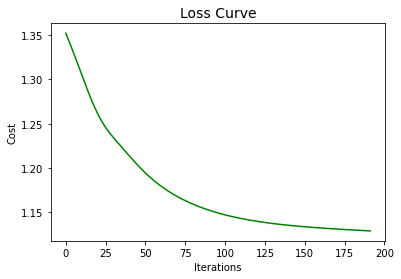

NameError: name 'predict_train' is not defined

In [14]:
#Lose Curve of training & testing set with 500 iterations

plt.plot(revised_mlp.loss_curve_, 'g')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(predict_train)
plt.plot(revised_mlp2.loss_curve_, 'r')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(predict_test)

In [21]:
# setting up MLP with optimal hyperparameters & iteration updated to 1200
revised_mlp3 =  MLPClassifier(hidden_layer_sizes=(12,10,3), activation='tanh', solver='adam', alpha=0.32, max_iter=1200, learning_rate = 'adaptive')
revised_mlp3.fit(X_train,y_train)
#revised_mlp.out_activation_ = 'softmax'

revised_mlp4 =  MLPClassifier(hidden_layer_sizes=(12,10,3), activation='tanh', solver='adam', alpha=0.32, max_iter=1200, learning_rate = 'adaptive')
revised_mlp4.fit(X_test, y_test)

C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lester\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(activation='tanh', alpha=0.32, hidden_layer_sizes=(12, 10, 3),
              learning_rate='adaptive', max_iter=1200)

In [22]:
#Evaluate MLP Model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
#mlp.out_activation_ = 'softmax'
predict_train=revised_mlp3.predict(X_train)
print("MLP confusion_matrix", "\n", confusion_matrix(y_train,predict_train))
print("\n")
print("MLP classification report", "\n", classification_report(y_train,predict_train))

MLP confusion_matrix 
 [[37  1  0]
 [ 0 30  0]
 [ 1  0 30]]


MLP classification report 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        38
           3       0.97      1.00      0.98        30
           4       1.00      0.97      0.98        31

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



In [23]:
#Evaluate Prediction Result
predict_test= revised_mlp3.predict(X_test)
print("MLP Prediction confusion_matrix", "\n", confusion_matrix(y_test,predict_test))
print("\n")
print("MLP Prediction classification report", "\n", classification_report(y_test,predict_test))


MLP Prediction confusion_matrix 
 [[11  1  0]
 [ 0 10  0]
 [ 0  0 10]]


MLP Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



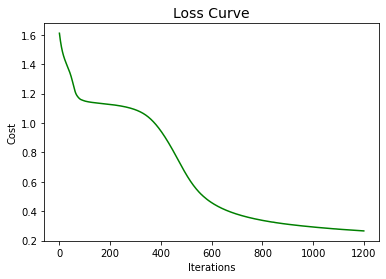

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


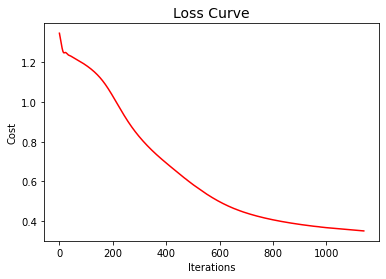

[1 1 1 3 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3]


In [24]:
#Lose Curve

plt.plot(revised_mlp3.loss_curve_, 'g')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(predict_train)
plt.plot(revised_mlp4.loss_curve_, 'r')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(predict_test)